<a href="https://colab.research.google.com/github/SidU/LLMs-from-scratch/blob/main/LinearLayerIntuition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🔢 Understanding Linear Layers in PyTorch
## What is a Linear Layer?
A **linear layer** in a neural network applies the transformation:

$Y = XW + b$

where:
- **X** = Input features (batch of data).
- **W** = Weight matrix (learned parameters).
- **b** = Bias vector (optional, also learned).
- **Y** = Transformed output.

### ✨ What We Will Do in This Notebook
✅ Define a **linear layer in PyTorch**  
✅ **Manually compute the transformation** step-by-step  
✅ **Verify results using PyTorch**  
✅ **Visualize how a linear transformation works**


# Define a simple linear layer in PyTorch

In [2]:
import torch
import torch.nn as nn

# Define a Linear Layer (2 input features → 3 output neurons)
linear_layer = nn.Linear(in_features=2, out_features=3)

# Check the shape of the weight matrix
print("Weight Matrix Shape:", linear_layer.weight.shape)  # Expected: (3,2)


Weight Matrix Shape: torch.Size([3, 2])


# Section 3: Manually Set Weights and Compute Output



In [4]:
import torch
import torch.nn as nn

# Define Linear Layer (2 input features → 3 output neurons)
linear_layer = nn.Linear(in_features=2, out_features=3)

# Define input tensor (1 sample, 2 features)
X = torch.tensor([[1.0, 2.0]])

# Manually set weights and bias for clear understanding
with torch.no_grad():
    linear_layer.weight = nn.Parameter(torch.tensor([[0.5, 1.0],  # Neuron 1
                                                     [0.2, -0.3], # Neuron 2
                                                     [-0.5, 0.8]])) # Neuron 3
    linear_layer.bias = nn.Parameter(torch.tensor([0.1, -0.2, 0.3]))

# Compute output
output = linear_layer(X)

# Print input, weights, bias, and output with .detach() to remove computation graph dependency
print("Input (X):", X.numpy())
print("Weights (W):", linear_layer.weight.detach().numpy())
print("Bias (b):", linear_layer.bias.detach().numpy())
print("Output (Y):", output.detach().numpy())


Input (X): [[1. 2.]]
Weights (W): [[ 0.5  1. ]
 [ 0.2 -0.3]
 [-0.5  0.8]]
Bias (b): [ 0.1 -0.2  0.3]
Output (Y): [[ 2.6       -0.6        1.4000001]]


## 🤔 Why Is the Weight Matrix (3×2) Instead of (2×3)?
Many people expect **2 rows and 3 columns** instead of **3 rows and 2 columns**.
### But actually:
- Each **row corresponds to an output neuron**.
- Each **column corresponds to an input feature**.

#### **Matrix Multiplication Step:**
We compute:
$
Y = XW^T + b
$

For our input:
$
X = [1.0, 2.0]
$

**Step 1: Compute Weighted Sum**


In [5]:
# Manually compute Y = XW^T + b
W = linear_layer.weight.detach().numpy()
b = linear_layer.bias.detach().numpy()

Y_manual = X.numpy().dot(W.T) + b

# Print manual computation vs. PyTorch output
print("Manually Computed Output:", Y_manual)
print("PyTorch Output:", linear_layer(X).detach().numpy())

Manually Computed Output: [[ 2.6       -0.6        1.4000001]]
PyTorch Output: [[ 2.6       -0.6        1.4000001]]


# Visualizing a linear transformation

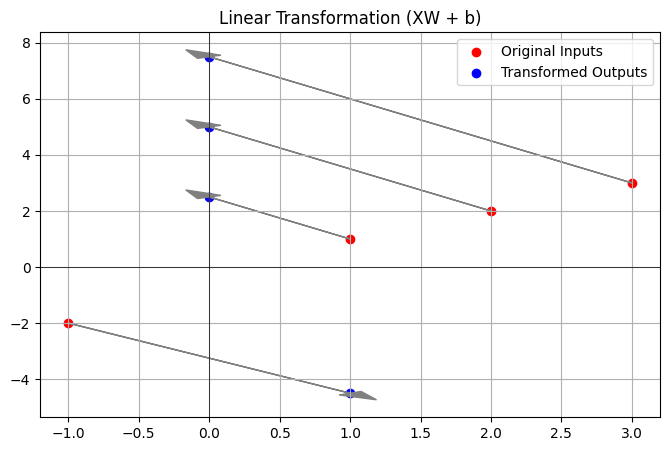

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Define a 2D space
X_vals = np.array([[1, 1], [2, 2], [3, 3], [-1, -2]])
W_vals = np.array([[1, -1], [0.5, 2]])
b_vals = np.array([0, 0])

# Compute transformed points
Y_vals = X_vals @ W_vals.T + b_vals

# Plot original points
plt.figure(figsize=(8, 5))
plt.scatter(X_vals[:, 0], X_vals[:, 1], color="red", label="Original Inputs")

# Plot transformed points
plt.scatter(Y_vals[:, 0], Y_vals[:, 1], color="blue", label="Transformed Outputs")

# Draw arrows to show transformation
for i in range(len(X_vals)):
    plt.arrow(X_vals[i, 0], X_vals[i, 1],
              Y_vals[i, 0] - X_vals[i, 0], Y_vals[i, 1] - X_vals[i, 1],
              color="gray", head_width=0.2)

plt.axhline(0, color="black", linewidth=0.5)
plt.axvline(0, color="black", linewidth=0.5)
plt.grid()
plt.legend()
plt.title("Linear Transformation (XW + b)")
plt.show()


## 🔥 What We Learned
✅ A **linear layer** applies the transformation: **Y = XW + b**  
✅ PyTorch handles this automatically using `nn.Linear(in_features, out_features)`.  
✅ We **manually computed the transformation** step-by-step.  
✅ We **visualized how linear transformations affect inputs.**  

## 🚀 Next Steps
Try experimenting by:
- Changing `W` and `b` to see how transformations affect outputs.
- Using a **larger dataset** to explore projections in **higher dimensions**.


# 🎯 How Can a Simple Linear Layer Learn Complex Concepts?
A **linear layer** applies the transformation:
$
Y = XW + b
$
where:
- **X** = Input features
- **W** = Weight matrix (learned)
- **b** = Bias vector (learned)

But this is just a **weighted sum**. So how do we go from **linear algebra** to **understanding language, recognizing images, or even reasoning?**

### ✨ **Three Key Ingredients**
✅ **1. Stacking Layers (Deep Learning)**
- A **single** linear layer learns only simple patterns.
- **Multiple layers** allow the model to build **hierarchical features**.
- Lower layers learn **edges** (vision) or **words** (text), while deeper layers learn **objects** or **grammar**.

✅ **2. Activation Functions (Non-Linearity)**
- Without activation functions, multiple layers **collapse into one big linear function**.
- **ReLU, GELU, and Sigmoid** allow networks to learn complex decision boundaries.

✅ **3. Learning from Data (Backpropagation)**
- The network **adjusts weights** through training.
- Over time, it discovers patterns **on its own**.

### 🧠 **Let’s See This in Action!**
We’ll train a **stack of linear layers** to learn a non-trivial function.


# 🔥 Understanding the Multi-Layer Perceptron (MLP) Model

## 🧠 What Does This Model Do?
This model is a **Multi-Layer Perceptron (MLP)**, a type of **feedforward neural network** that can learn **complex, non-linear functions**.

### ⚙️ How Does It Work?
- A **single-layer model** (`nn.Linear(1,1)`) can only fit **straight lines**.
- This model **stacks multiple layers**, allowing it to **learn curves and more abstract patterns**.
- By adding **activation functions (ReLU)** between layers, it can **model non-linear relationships**.

### 📈 What Will We Do in This Notebook?
✅ Define a **multi-layer perceptron (MLP) in PyTorch**  
✅ **Manually compute the transformation** step-by-step  
✅ **Compare with a simple linear model**  
✅ **Visualize how a deeper network learns better**


# 📈 Visualizing How the MLP Learns
Now, let’s **train our MLP model** and see how it learns a **non-linear function**.
We’ll use a dataset based on:
$
Y = X^3 - X
$


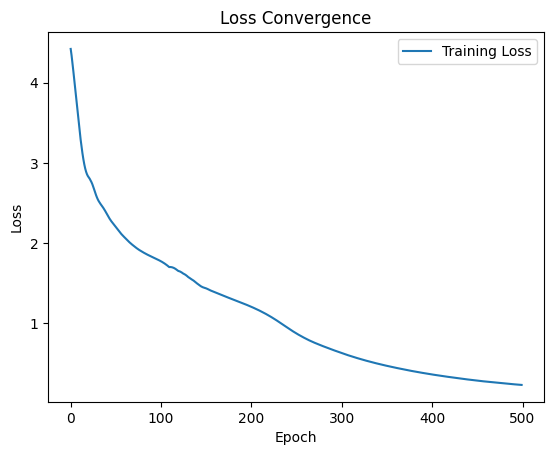

In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

# Generate synthetic data (X) and a non-linear function Y = X^3 - X
torch.manual_seed(42)
X = torch.linspace(-2, 2, 100).reshape(-1, 1)  # Input: Shape (100, 1)
Y = X**3 - X + 0.2 * torch.randn_like(X)  # Non-linear target function with noise

# Define a multi-layer neural network
class SimpleMLP(nn.Module):
    def __init__(self):
        super(SimpleMLP, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(1, 10),  # Expanding feature space
            nn.ReLU(),
            nn.Linear(10, 10),
            nn.ReLU(),
            nn.Linear(10, 1)  # Compressing back to 1 output
        )

    def forward(self, x):
        return self.layers(x)

# Instantiate model, define loss and optimizer
model = SimpleMLP()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training loop
losses = []
for epoch in range(500):
    optimizer.zero_grad()
    outputs = model(X)
    loss = criterion(outputs, Y)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())

# Plot loss curve
plt.plot(losses, label="Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss Convergence")
plt.legend()
plt.show()


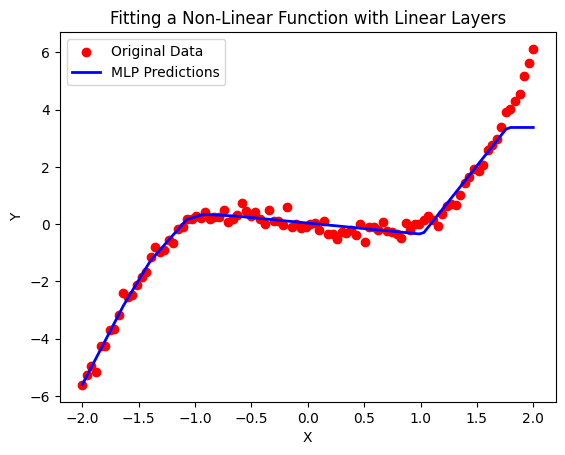

In [8]:
# Generate predictions
Y_pred = model(X).detach().numpy()

# Plot original data and model predictions
plt.scatter(X.numpy(), Y.numpy(), label="Original Data", color="red")
plt.plot(X.numpy(), Y_pred, label="MLP Predictions", color="blue", linewidth=2)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Fitting a Non-Linear Function with Linear Layers")
plt.legend()
plt.show()


# 🚀 What Did We Learn?
✅ **Linear layers alone cannot capture complex patterns**, but stacking them with **activations** allows learning of non-linear functions.  
✅ **Without activation functions, all layers collapse into one linear transformation** (no matter how deep the network is!).  
✅ **Even a simple neural network can approximate complex mathematical functions** just by learning weights from data!  

### 🔥 Next Steps
- Try **removing activation functions** and see if the model still learns.
- Increase the number of **layers** and observe how training changes.
- Train on real-world datasets and experiment with different architectures.

🎯 **This is exactly how GPT, BERT, and other models learn complex concepts—by stacking simple layers intelligently!**
